In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import Pythoncf as pcf
from sklearn.preprocessing import StandardScaler

In [160]:
data=pd.read_csv("bank-additional-full.csv",delimiter=';')

In [161]:
def transform_age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4       
    return dataframe

def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

In [162]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### There is no point in using this variable because duration is the time of the call when call is made to the customer so when you have to call customer first time you don't know the duration variable. If this variable is used then accuracy will improve but using this does not make a sense

In [163]:
data.drop('duration',axis=1,inplace=True)

In [164]:
print('1º Quartile: ', data['age'].quantile(q = 0.25))
print('2º Quartile: ', data['age'].quantile(q = 0.50))
print('3º Quartile: ', data['age'].quantile(q = 0.75))
print('4º Quartile: ', data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('Ages above: ', data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', data[data['age'] > 69.6]['age'].count())
print('Number of clients: ', len(data))
#Outliers in %
print('Outliers are:', round(data[data['age'] > 69.6]['age'].count()*100/len(data),2), '%')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [165]:
# Transforming the Data 
data=transform_age(data) # Actual transformation of the age 
data.age.replace({1:"young",2:"lower_middle",3:"middle",4:"senior"},inplace=True) # Renaming them to further use them.

# Generating new feature which combines both 'age' and 'marital'
data['life_stage'] = data.apply(lambda x: x['age'] +' & ' + x['marital'], axis = 1)  

data['campaign>14']=data.campaign.apply(lambda x: 1 if x>14 else 0)
data['campaign>11']=data.campaign.apply(lambda x: 1 if x>11 else 0)
data['campaign>6']=data.campaign.apply(lambda x: 1 if x>6 else 0)
data.campaign=data.campaign.replace(to_replace=list(range(11,57)),value=np.NaN)
data=pcf.replace_category10(data,'campaign',1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0)


data.marital.replace({'unknown':'married'},inplace=True)

data.education.replace({'illiterate':'university.degree'},inplace=True)

data['pdays_999']=data.pdays.apply(lambda x: 1 if x==999 else 0)
## Means client was not contacted after last contact
data['pdays_3']=data.pdays.apply(lambda x: 1 if x==3 else 0)
data['pdays_6']=data.pdays.apply(lambda x: 1 if x==6 else 0)
data['pdays_4']=data.pdays.apply(lambda x: 1 if x==4 else 0)
data['pdays_9']=data.pdays.apply(lambda x: 1 if x==9 else 0)
data['pdays_2']=data.pdays.apply(lambda x: 1 if x==2 else 0)
data['pdays_7']=data.pdays.apply(lambda x: 1 if x==7 else 0)
data['pdays_12']=data.pdays.apply(lambda x: 1 if x==12 else 0)
data['pdays>10']=data.pdays.apply(lambda x: 1 if x>=10 else 0)
data['pdays>5']=data.pdays.apply(lambda x: 1 if x>=5 else 0)
data['pdays>13']=data.pdays.apply(lambda x: 1 if x>=13 else 0)
data['pdays>11']=data.pdays.apply(lambda x: 1 if x>=11 else 0)
data['pdays>1']=data.pdays.apply(lambda x: 1 if x>=1 else 0)
data['pdays>15']=data.pdays.apply(lambda x: 1 if x>=15 else 0)

data['previous>4']=data.previous.apply(lambda x: 1 if x>=4 else 0)
data.previous.replace(to_replace=[4,5,6,7],value=np.NaN,inplace=True)
data=pcf.replace_category4(data,'previous',0.0,1.0,2.0,3.0)

data_dummy=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','campaign', 'previous','poutcome','life_stage']
for var in data_dummy:
    data=pcf.create_dummies(data,var)
    
data.y.replace({'yes':1,'no':0},inplace=True)

# Scaling the data 
scaler=StandardScaler()
data=pd.concat([data['y'],pd.DataFrame(data=scaler.fit_transform(data.drop('y',axis=1)),columns=data.columns.difference(['y']).values)],axis=1)

In [166]:
data.head()

,y,age_middle,age_senior,age_young,campaign>11,campaign>14,campaign>6,campaign_10.0,campaign_2.0,campaign_3.0,...,pdays_6,pdays_7,pdays_9,pdays_999,poutcome_nonexistent,poutcome_success,previous>4,previous_1.0,previous_2.0,previous_3.0
0,0,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,-0.099777,-0.130721,-0.249076,...,2.173416,-0.122506,-0.025133,-0.055173,-0.083029,-0.019087,-0.110742,-0.338534,-0.429633,-0.024146
1,0,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,-0.099777,-0.130721,-0.249076,...,2.173416,-0.122506,-0.025133,-0.055173,-0.083029,-0.019087,-0.110742,-0.338534,-0.429633,-0.024146
2,0,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,-0.099777,-0.130721,-0.249076,...,-0.460105,-0.122506,-0.025133,-0.055173,-0.083029,-0.019087,-0.110742,-0.338534,-0.429633,-0.024146
3,0,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,-0.099777,-0.130721,-0.249076,...,-0.460105,-0.122506,-0.025133,-0.055173,-0.083029,-0.019087,-0.110742,-0.338534,-0.429633,-0.024146
4,0,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,-0.099777,-0.130721,-0.249076,...,2.173416,-0.122506,-0.025133,-0.055173,-0.083029,-0.019087,-0.110742,-0.338534,-0.429633,-0.024146


In [172]:
X = data.drop(['y'], axis=1)
y = data['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)

In [173]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6977   96]
 [ 718  209]]
90.0


In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6980   93]
 [ 738  189]]
90.0


In [177]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())

[[6782  291]
 [ 682  245]]
88.0


In [178]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())

[[6458  615]
 [ 628  299]]
84.0


In [179]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())

[[6849  224]
 [ 648  279]]
89.0


In [180]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())

[[6663  410]
 [ 558  369]]
88.0


In [181]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 3,n_jobs=-1).mean())

C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[6990   83]
 [ 714  213]]
90.0


In [182]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())

[[6980   93]
 [ 697  230]]
90.0


In [183]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.900717
6,XGBoost,0.900687
4,Logistic Model,0.899391
3,K-Near Neighbors,0.895987
0,Random Forest Classifier,0.890683
5,Gausian NB,0.878571
2,Support Vector Machine,0.877878
1,Decision Tree Classifier,0.845426


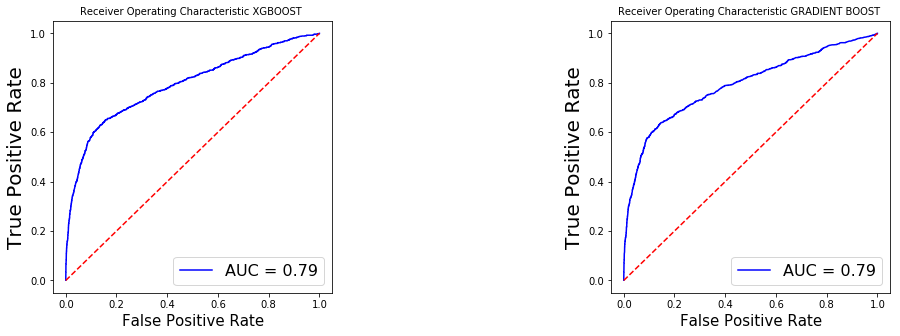

In [184]:
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

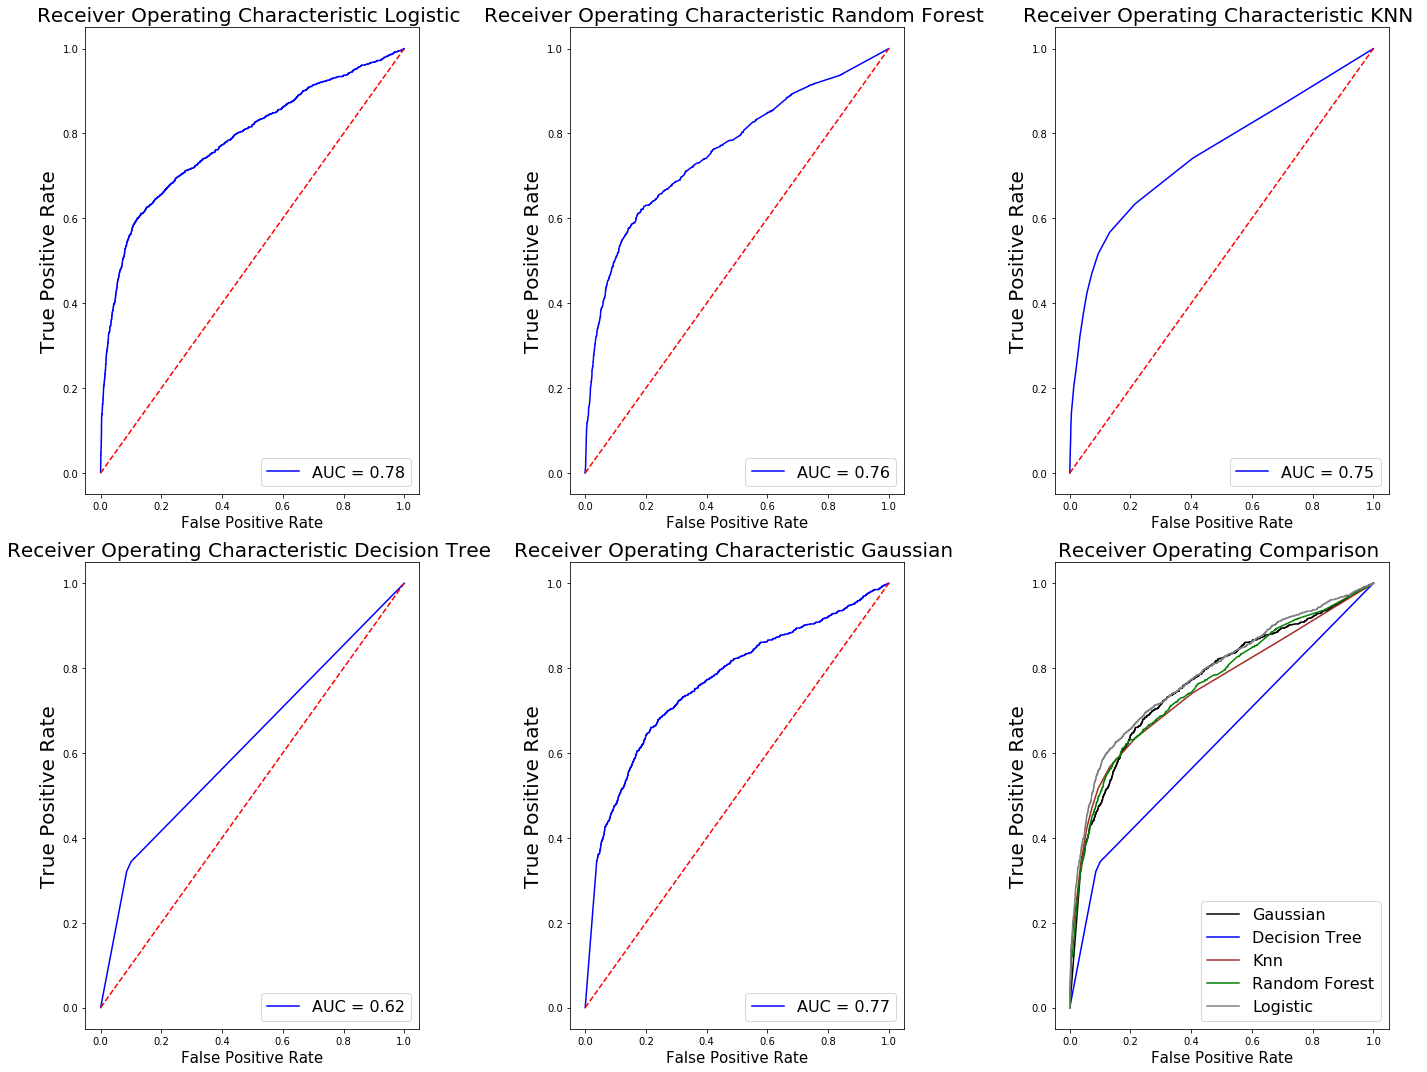

In [185]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

ANALYZING THE RESULTS
So now we have to decide which one is the best model, and we have two types of wrong values:

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
In my opinion:

The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings
The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client
So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
Obs1 - lets go back and look the best confusion matrix that attend this criteria Obs2 - i'll do the math manualy to be more visible and understanding

In [186]:
from sklearn.metrics import classification_report

In [187]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[6980   93]
 [ 738  189]]


In [188]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
              precision    recall  f1-score   support

          0       0.90      0.99      0.94      7073
          1       0.67      0.20      0.31       927

avg / total       0.88      0.90      0.87      8000



#### Specificity TN / (TN + FP)

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 6980 +93 = 7073 clients that didin't subscribe(0), and our model predict 99% correct or 6980 correct and 93 incorrect

In [202]:
print(round(6980 /(6980 + 93),2))

0.99


#### Sensitivity TP / (TP + FN)

For all POSITIVE(1) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 189 + 738 = 927 clients that subscribe(1), and our model predict 20% correct or 189 correct and 738 incorrect, BUT REMEMBER, its best we miss by False negative instead of False Positive

In [196]:
print(round(189 / (189 + 738),2))
print(round(metrics.recall_score(y_test, knnpred),2))

0.2
0.2


#### Precision  TN / (TN + FN)

For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 6980 + 738 = 7718 clients that didin't subscribe(0), and our model predict 90% correct or 6980 correct and 738 incorrect

In [197]:
print(round(6980 / (6980 +738),2))

0.9


TN / (TN + FN) 
For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 189 + 93 = 282 clients that subscribe(1), and our model predict 67% correct or 189 correct and 93 incorrect

In [199]:
print(round( 189/ (189 + 93),2))
print(round(metrics.precision_score(y_test, knnpred),2))

0.67
0.67


#### F1-SCORE
F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics.
 F1 = 2(Precision(0) Recall(0)) / (Precision(0) + Recall(0))

In [198]:
F1_0 = 2*0.90*0.99/(0.90+0.99)
round(F1_0,2)

0.94

In [201]:
F1_1 = 2*0.67*0.20/(0.67+0.20)
round(F1_1,2)

0.31

####  AVG/TOTAL

In [203]:
AVG_precision =  (0.90*(7073/8000))+ (0.67*(927/8000))
round(AVG_precision,2)

0.87

In [204]:
AVG_Recall =  (0.99*(7073/8238))+ (0.20*(927/8238))
round(AVG_Recall,2)

0.87

In [207]:
output=pd.DataFrame()

In [208]:
output['Yes/No']=knnpred

In [212]:
output.to_csv("output.csv")

### Now let's try to finetune the cutoff using Sensitivity and Specificity 

In [216]:
train_predict=pd.DataFrame(columns=['actual','prob'])
train_predict['actual']=y_train
train_predict['prob']=knn.predict_proba(X_train)
train_predict.head()

,actual,prob
38912,1,0.181818
9455,0,0.954545
14153,1,0.863636
25021,0,0.954545
30911,0,0.954545


In [242]:
test_predict=pd.DataFrame(columns=['actual','prob'])
test_predict['actual']=y_test
test_predict['prob']=knn.predict_proba(X_test)
test_predict.head()

,actual,prob
3669,0,0.954545
20131,0,0.954545
2492,0,0.954545
14088,0,0.909091
34986,0,0.954545


In [262]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x > cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [263]:
roc_like_df.head()

,cutoff,sensitivity,specificity
0,0.000000,0.000000,1.0
0,0.020408,0.000000,1.0
0,0.040816,0.000000,1.0
0,0.061224,0.001347,1.0
0,0.081633,0.001347,1.0


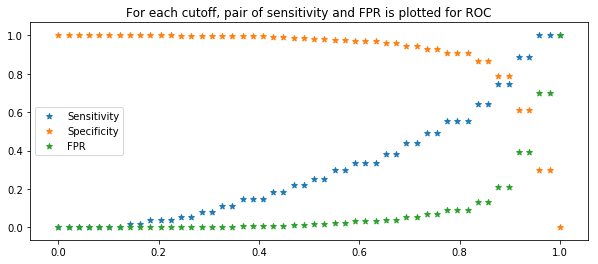

In [264]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [265]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.877551,0.745489,0.78704,1.532529
0,0.897959,0.745489,0.78704,1.532529


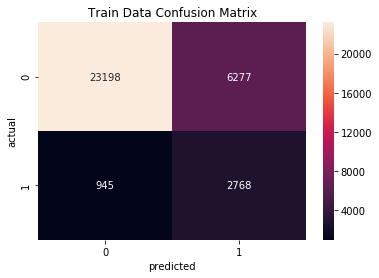

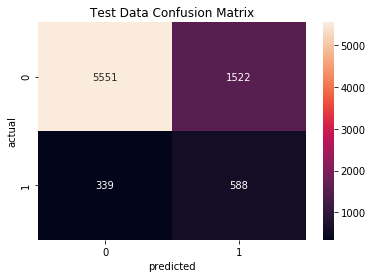

In [248]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x < 0.897959 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x < 0.897959 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()
# (117+236)/(117+236+120+17)

In [249]:
a=knn.predict(X_train)
b=knn.predict(X_test)

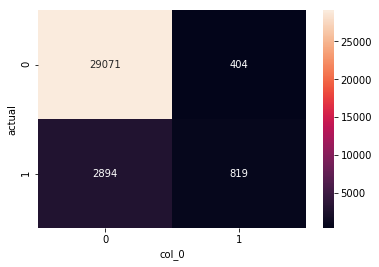

In [250]:
sns.heatmap(pd.crosstab(train_predict['actual'], a), annot=True, fmt='.0f')

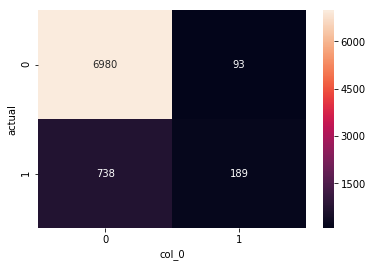

In [251]:
sns.heatmap(pd.crosstab(test_predict['actual'], b), annot=True, fmt='.0f')

### Score before Finetuning the cutoff

In [252]:
accuracy_score(y_train,a)

0.9006267325539351

In [253]:
accuracy_score(y_test,b)

0.896125

### Score after finetuning the cutoff

In [255]:
accuracy_score(y_train,train_predict['predicted'])

0.7823912257442449

In [256]:
accuracy_score(y_test,test_predict['predicted'])

0.767375

### As we see there is no improvement in the score so we will use the last model for further improvement in the score and find our customer base using KS and Lift 